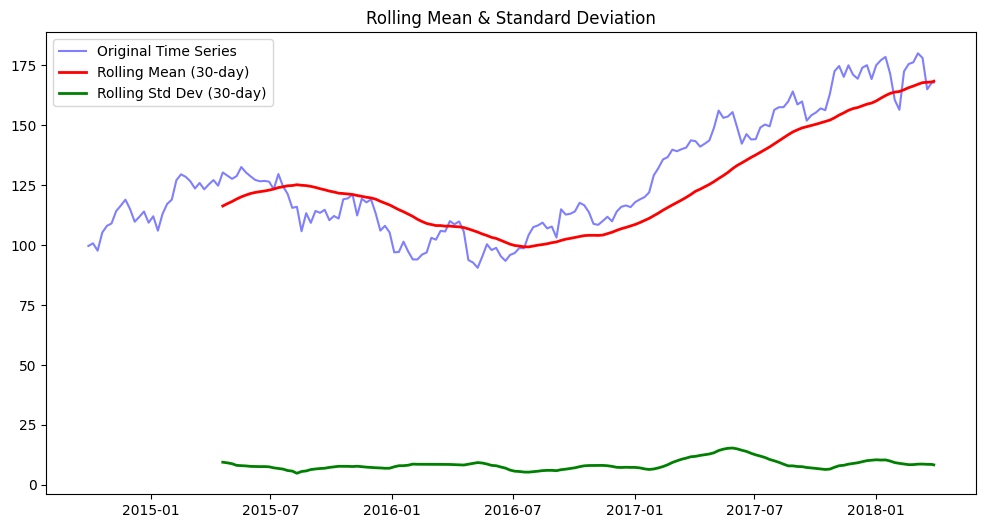


Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -0.868202
p-value                   0.798264
# Lags Used               0.000000
# Observations Used     183.000000
Critical Value (1%)      -3.466598
Critical Value (5%)      -2.877467
Critical Value (10%)     -2.575260
dtype: float64

❌ The time series is NOT stationary (p-value > 0.05).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = 'AAPL.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Selecting only the 'Close' price for analysis
ts = data['Close']

# Function to check stationarity
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=30).mean()
    rolling_std = timeseries.rolling(window=30).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Time Series', color='blue', alpha=0.5)
    plt.plot(rolling_mean, label='Rolling Mean (30-day)', color='red', linewidth=2)
    plt.plot(rolling_std, label='Rolling Std Dev (30-day)', color='green', linewidth=2)
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

    # Augmented Dickey-Fuller Test
    print("\nAugmented Dickey-Fuller Test Results:")
    adf_test = adfuller(timeseries, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    print(results)

    # Conclusion
    if adf_test[1] <= 0.05:
        print("\n✅ The time series is stationary (p-value <= 0.05).")
    else:
        print("\n❌ The time series is NOT stationary (p-value > 0.05).")

# Run stationarity check
check_stationarity(ts)
